In [135]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

import distribtest as dt

In [136]:
# path to distance analysis outputs
results_path = 'outputs'

In [137]:
os.listdir(results_path)

['loss_conv_4_2_euclidean_data.npy',
 'loss_conv_4_2_euclidean_sketchdpdc.npy',
 'loss_conv_4_2_euclidean_neighbor.npy',
 'loss_conv_4_2_euclidean_swapped.npy',
 'loss_conv_4_2_euclidean_sketchspsc.npy',
 'loss_conv_4_2_euclidean_sketchdpsc.npy',
 'loss_conv_4_2_euclidean_photodpsc.npy',
 'loss_conv_4_2_euclidean_photodpdc.npy']

In [138]:
# load in distance vectors
d = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_data.npy'))
s = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_swapped.npy'))
n = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_neighbor.npy'))

## get list of filenames
sketch_dir = '/home/jefan/full_sketchy_dataset/sketches'
sketch_paths = dt.list_files(sketch_dir, ext='png')

In [139]:
# construct pandas dataframe from distance vectors
X = pd.DataFrame([d,s,n,sketch_paths])
X = X.transpose()
X.columns = ['target','diff_class','same_class','sketch_paths']

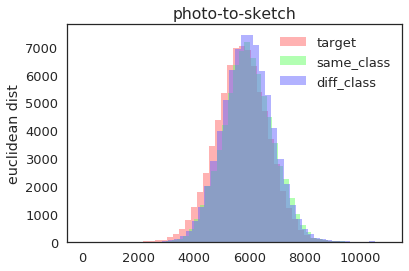

In [140]:
sns.set_context('talk')
f = plt.figure(figsize=(9,4))
fig, ax = plt.subplots()
colors = [(1,0.4,0.4),(0.4,1, 0.4),(0.4,0.4,1)]
n, bins, p = plt.hist(X.target,bins=50,alpha=0.5,label='target')
h = plt.setp(p,'facecolor', colors[0])
n, bins, p = plt.hist(X.same_class,bins=50,alpha=0.5,label='same_class')
h = plt.setp(p,'facecolor', colors[1])
n, bins, p = plt.hist(X.diff_class,bins=50,alpha=0.5,label='diff_class')
h = plt.setp(p,'facecolor', colors[2])
plt.ylabel('euclidean dist')
plt.title('photo-to-sketch')
ax.legend()


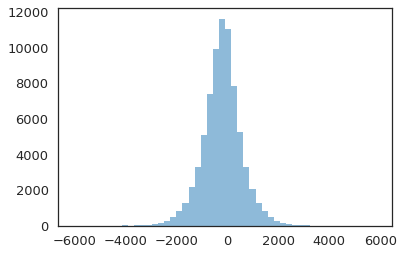

In [141]:
sns.set_context('talk')
f = plt.figure(figsize=(9,4))
fig, ax = plt.subplots()
colors = [(1,0.4,0.4),(0.4,1, 0.4),(0.4,0.4,1)]
n, bins, p = plt.hist(X.target-X.diff_class,bins=50,alpha=0.5,label='target')

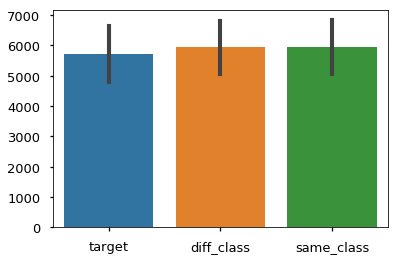

In [11]:
sns.barplot(data=X,order=['target','diff_class','same_class'],ci='sd')

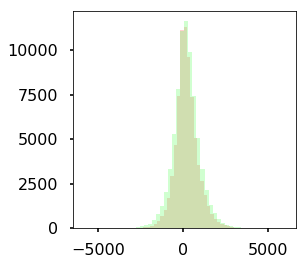

In [14]:
sns.set_context('poster')
f = plt.figure(figsize=(4,4))
colors = [(1,0.4,0.4),(0.4,1, 0.4),(0.4,0.4,1)]
n, bins, p = plt.hist(X.same_class-X.target,bins=50,alpha=0.3)
h = plt.setp(p,'facecolor', colors[0])
n, bins, p = plt.hist(X.diff_class-X.target,bins=50,alpha=0.3)
h = plt.setp(p,'facecolor', colors[1])

In [85]:
sort_inds = np.argsort(X.target.values)
close = X.iloc[sort_inds][1:51]
middle = X.iloc[sort_inds][35000:35050]
far = X.iloc[sort_inds][max(sort_inds)-50:max(sort_inds)]

In [107]:
close_paths = close.sketch_paths.values
far_paths = far.sketch_paths.values
mid_paths = middle.sketch_paths.values

In [105]:
import matplotlib.image as mpimg

## save high_euclideans out as gallery
fig = plt.figure(figsize=(50,50))
for s in np.arange(50):
    ax = plt.subplot(10,5,s+1)
    img=mpimg.imread(far_paths[s])
    imgplot = plt.imshow(img)
    y = ax.axis('off')
fig.savefig('plots/high_euclideans.png',bbox_inches='tight')
plt.close()    

In [106]:
## save low_euclideans out as gallery
fig = plt.figure(figsize=(50,50))
these = close_paths
for s in np.arange(50):
    ax = plt.subplot(10,5,s+1)
    img=mpimg.imread(these[s])
    imgplot = plt.imshow(img)
    y = ax.axis('off')
fig.savefig('plots/low_euclideans.png',bbox_inches='tight')
plt.close() 

In [108]:
## save mid_euclideans out as gallery
fig = plt.figure(figsize=(50,50))
these = mid_paths
for s in np.arange(50):
    ax = plt.subplot(10,5,s+1)
    img=mpimg.imread(these[s])
    imgplot = plt.imshow(img)
    y = ax.axis('off')
fig.savefig('plots/mid_euclideans.png',bbox_inches='tight')
plt.close() 

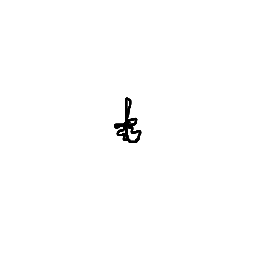

In [91]:
im = Image.open(close_paths[0])
im

In [128]:
# construct pandas dataframe from distance vectors

# load in sketch similarity vectors
spsc = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_sketchspsc.npy')) # same photo; same class
dpsc = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_sketchdpsc.npy')) # diff photo; same class
dpdc = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_sketchdpdc.npy')) # diff photo; diff class

# make pandas dataframe out of it
X = pd.DataFrame([spsc,dpsc,dpdc,sketch_paths])
X = X.transpose()
X.columns = ['spsc','dpsc','dpdc','sketch_paths']

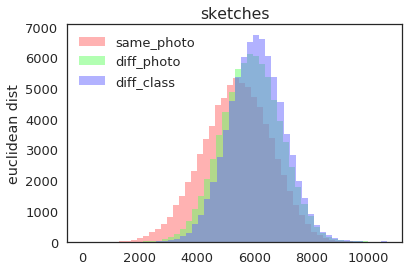

In [129]:
sns.set_context('talk')
sns.set_style("white")
sns.despine()
f = plt.figure(figsize=(9,4))
fig, ax = plt.subplots()
colors = [(1,0.4,0.4),(0.4,1, 0.4),(0.4,0.4,1)]
n, bins, p = plt.hist(X.spsc,bins=50,alpha=0.5,label='same_photo')
h = plt.setp(p,'facecolor', colors[0])
n, bins, p = plt.hist(X.dpsc,bins=50,alpha=0.5,label='diff_photo')
h = plt.setp(p,'facecolor', colors[1])
n, bins, p = plt.hist(X.dpdc,bins=50,alpha=0.5,label='diff_class')
h = plt.setp(p,'facecolor', colors[2])
plt.ylabel('euclidean dist')
plt.title('sketches')
ax.legend()


In [122]:
# construct pandas dataframe from distance vectors
## get list of filenames
photo_dir = '/home/jefan/full_sketchy_dataset/photos'
photo_paths = dt.list_files(photo_dir, ext='jpg')

# load in sketch similarity vectors
p_dpsc = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_photodpsc.npy')) # diff photo; same class
p_dpdc = np.load(os.path.join(results_path,'loss_conv_4_2_euclidean_photodpdc.npy')) # diff photo; diff class

# make pandas dataframe out of it
X = pd.DataFrame([p_dpsc,p_dpdc,photo_paths])
X = X.transpose()
X.columns = ['p_dpsc','p_dpdc','photo_paths']

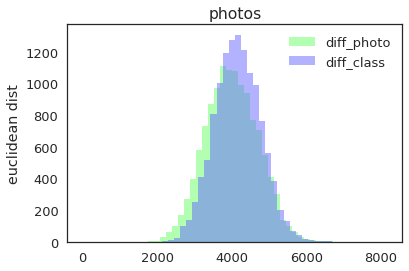

In [126]:
sns.set_context('talk')
sns.set_style("white")
sns.despine()
f = plt.figure(figsize=(9,4))
fig, ax = plt.subplots()
colors = [(1,0.4,0.4),(0.4,1, 0.4),(0.4,0.4,1)]
n, bins, p = plt.hist(X.p_dpsc,bins=50,alpha=0.5,label='diff_photo')
h = plt.setp(p,'facecolor', colors[1])
n, bins, p = plt.hist(X.p_dpdc,bins=50,alpha=0.5,label='diff_class')
h = plt.setp(p,'facecolor', colors[2])
plt.ylabel('euclidean dist')
plt.title('photos')
ax.legend()
